# PageRank

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import networkx as nx

## Example: Small graph

Create a directed graph with 4 vertices:

In [2]:
G1 = nx.DiGraph([(1,2),(2,1),(3,1),(3,2),(3,4),(2,4),(4,2)])

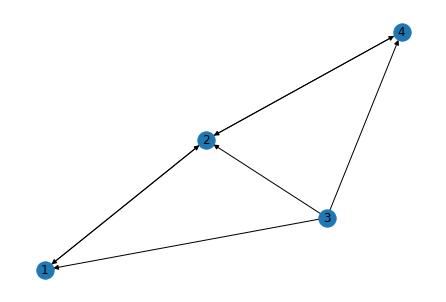

In [3]:
nx.draw(G1,with_labels=True)

Create the adjacency matrix for $G$ and note that our definition of adjacency matrix is the transpose of the definition used by `networkx`.

In [4]:
A1 = nx.adjacency_matrix(G1).toarray().T
A1

array([[0, 1, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 0, 0],
       [0, 1, 1, 0]], dtype=int64)

Create the stochastic matrix:

In [5]:
P1 = A1 / A1.sum(axis=0)
P1

array([[0.        , 0.5       , 0.33333333, 0.        ],
       [1.        , 0.        , 0.33333333, 1.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.33333333, 0.        ]])

Create the Google matrix:

In [6]:
alpha=0.85
M1 = alpha*P1 + (1-alpha)*(1/4)*np.ones((4,4))
M1

array([[0.0375    , 0.4625    , 0.32083333, 0.0375    ],
       [0.8875    , 0.0375    , 0.32083333, 0.8875    ],
       [0.0375    , 0.0375    , 0.0375    , 0.0375    ],
       [0.0375    , 0.4625    , 0.32083333, 0.0375    ]])

Perform 50 iterations of the power method to find the PageRank vector:

In [7]:
x1 = np.array([1,0,0,0])
for k in range(0,50):
    x1 = M1@x1

In [8]:
x1

array([0.24720132, 0.46809736, 0.0375    , 0.24720132])

Compare to the networkx functions:

In [9]:
nx.google_matrix(G1).T

matrix([[0.0375    , 0.4625    , 0.32083333, 0.0375    ],
        [0.8875    , 0.0375    , 0.32083333, 0.8875    ],
        [0.0375    , 0.0375    , 0.0375    , 0.0375    ],
        [0.0375    , 0.4625    , 0.32083333, 0.0375    ]])

In [10]:
nx.pagerank(G1)

{1: 0.24712881730381647,
 2: 0.46824236539236713,
 3: 0.037500000000000006,
 4: 0.24712881730381647}

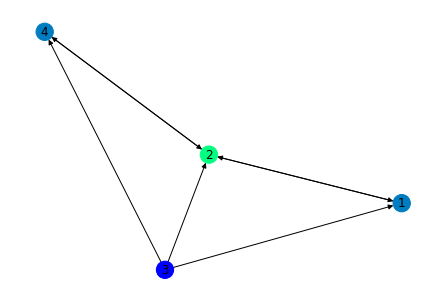

In [11]:
nx.draw(G1,node_color=x1,cmap='winter',with_labels=True)

## Example: Random graph

In [12]:
n_pages = 20
n_links = 100
edges = [(np.random.randint(n_pages),np.random.randint(n_pages)) for _ in range(0,n_links)]
G2 = nx.DiGraph(edges)

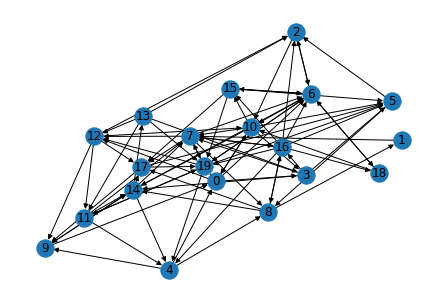

In [13]:
nx.draw(G2,pos=nx.spring_layout(G2),with_labels=True)

In [14]:
A2 = nx.adjacency_matrix(G2).toarray().T
P2 = A2 / A2.sum(axis=0)
alpha=0.85
M2 = alpha*P2 + (1-alpha)*(1/n_pages)*np.ones((n_pages,n_pages))
x2 = np.zeros(n_pages)
x2[0] = 1
for k in range(0,50):
    x2 = M2@x2

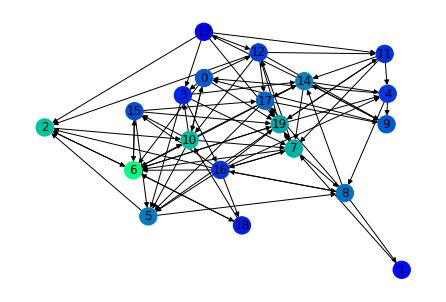

In [16]:
nx.draw(G2,node_color=x2,cmap='winter',with_labels=True)

In [17]:
x2

array([0.0802385 , 0.04696405, 0.06009279, 0.07613545, 0.10247826,
       0.07216327, 0.03767427, 0.05043052, 0.04661559, 0.03428354,
       0.0581006 , 0.04216734, 0.02525564, 0.08243059, 0.01909928,
       0.03234939, 0.03497356, 0.02794937, 0.01601315, 0.05458484])

In [18]:
nx.pagerank(G2)

{10: 0.0802370748385185,
 0: 0.04696500253904713,
 14: 0.060093739989882884,
 7: 0.07613580941833176,
 6: 0.10247693180502013,
 19: 0.07216347724710774,
 12: 0.037674958236914385,
 17: 0.050430797891521176,
 9: 0.04661674054896144,
 16: 0.0342837792379691,
 5: 0.05810002028597409,
 15: 0.04216610175527637,
 18: 0.02525530539470295,
 2: 0.08242900061440164,
 1: 0.019099360631016943,
 11: 0.032350096843147394,
 4: 0.03497419378901065,
 3: 0.027949510584024076,
 13: 0.016013444495446068,
 8: 0.05458465385372542}